<a href="https://colab.research.google.com/github/kadobkina/CourseWork/blob/master/course_work_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kadobkina","key":"dd8f943bddbccadf6be2b84dcb212ed7"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d miracle9to9/files1

 99% 521M/525M [00:06<00:00, 147MB/s]
100% 525M/525M [00:06<00:00, 84.4MB/s]


In [ ]:
!unzip files1.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_201

In [ ]:
my_data_dir = '/content/Malaria Cells'

In [ ]:
os.listdir(my_data_dir)

['testing_set', 'training_set', 'single_prediction']

In [ ]:
test_path = my_data_dir+'/testing_set'
train_path = my_data_dir+'/training_set'

In [ ]:
os.listdir(test_path)

['Parasitized', 'Uninfected']

In [ ]:
os.listdir(train_path)

['Parasitized', 'Uninfected']

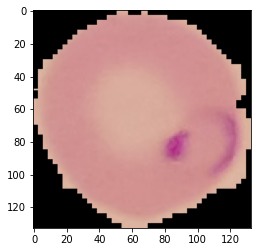

In [ ]:
para_cell = train_path+'/Parasitized/'+os.listdir(train_path+'//Parasitized')[5]
para_img= imread(para_cell)
plt.imshow(para_img)

In [ ]:
para_img.shape

(133, 133, 3)

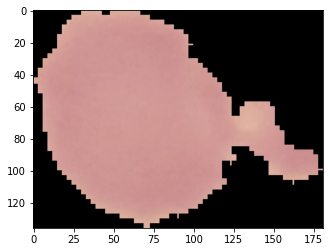

In [ ]:
unifected_cell = train_path+'/Uninfected/'+os.listdir(train_path+'//Uninfected')[5]
unifected_cell = imread(unifected_cell)
plt.imshow(unifected_cell)

In [ ]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/Uninfected'):

    img = imread(test_path+'/Uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


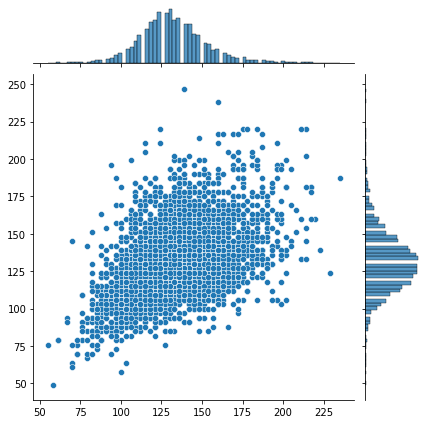

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

131.69187817258884

In [ ]:
np.mean(dim2)

131.275

In [ ]:
image_shape = (130,130,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=30, # поворачивает изображение на 30 градусов
                               width_shift_range=0.10, # изменяет ширину изображения максимум на 10%
                               height_shift_range=0.10, # изменяет высоту изображения максимум на 10%
                               rescale=1/255, # нормализация изображения: пиксели в диапазоне от 0 до 1
                               shear_range=0.05, # отрезание части изображения максимум на 5%
                               zoom_range=0.05, # увеличение изображения максимум на 5%
                               horizontal_flip=True, # разрешение на горизонтальное переворачивание
                               fill_mode='nearest' # заполнение недостающих пикселей ближайшими заполненными значениями
                              )

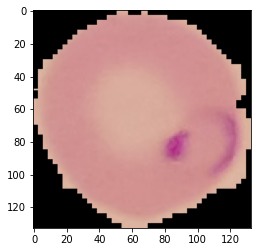

In [ ]:
plt.imshow(para_img)

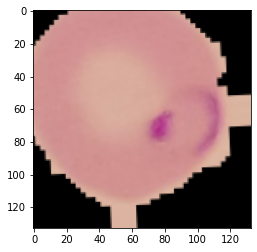

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 27558 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 15832 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
#гауссовский шум
import os
import cv2
def noisy(image):
    row,col,ch= image.shape
    mean = 0
    var = 0.02
    sigma = var**0.7
    gauss = abs(np.random.normal(mean,sigma,(row,col,ch)))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy

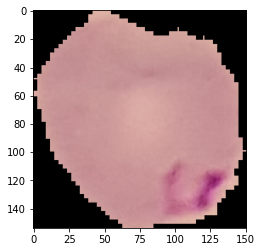

In [ ]:
plt.imshow(imread(train_path+'/Parasitized/'+os.listdir(train_path+'//Parasitized')[7]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


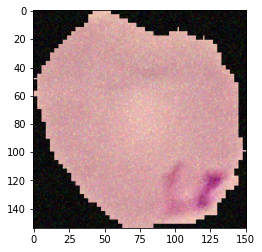

In [ ]:
plt.imshow(noisy(imread(train_path+'/Parasitized/'+os.listdir(train_path+'//Parasitized')[7])))

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing import image
for i in range(2000):
    imgn = noisy(imread(train_path+'/Uninfected/'+os.listdir(train_path+'//Uninfected')[i*2]))
    Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save(train_path+'/Uninfected/'+'noise'+str(i)+'.jpg')

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing import image
for i in range(2000):
    imgn = noisy(imread(train_path+'/Parasitized/'+os.listdir(train_path+'//Parasitized')[i*2]))
    Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save(train_path+'/Parasitized/'+'noise'+str(i)+'.jpg')

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing import image
for i in range(1000):
    imgn = noisy(imread(test_path+'/Uninfected/'+os.listdir(test_path+'//Uninfected')[i*2]))
    Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save(test_path+'/Uninfected/'+'noise'+str(i)+'.jpg')

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing import image
for i in range(1000):
    imgn = noisy(imread(test_path+'/Parasitized/'+os.listdir(test_path+'//Parasitized')[i*2]))
    Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save(test_path+'/Parasitized/'+'noise'+str(i)+'.jpg')

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary')

Found 31558 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',shuffle=False)

Found 17832 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
results = model.fit_generator(train_image_gen,
                              epochs=15,
                              validation_data=test_image_gen,
                              verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
1973/1973 [==============================] - 246s 109ms/step - loss: 0.3049 - accuracy: 0.8800 - val_loss: 0.1830 - val_accuracy: 0.9343
Epoch 2/15
1973/1973 [==============================] - 213s 108ms/step - loss: 0.1915 - accuracy: 0.9381 - val_loss: 0.1783 - val_accuracy: 0.9401
Epoch 3/15
1973/1973 [==============================] - 212s 108ms/step - loss: 0.1801 - accuracy: 0.9413 - val_loss: 0.1570 - val_accuracy: 0.9471
Epoch 4/15
1973/1973 [==============================] - 210s 106ms/step - loss: 0.1666 - accuracy: 0.9443 - val_loss: 0.1602 - val_accuracy: 0.9413
Epoch 5/15
1973/1973 [==============================] - 207s 105ms/step - loss: 0.1646 - accuracy: 0.9456 - val_loss: 0.1472 - val_accuracy: 0.9469
Epoch 6/15
1973/1973 [==============================] - 206s 104ms/step - loss: 0.1598 - accuracy: 0.9468 - val_loss: 0.1461 - val_accuracy: 0.9458
Epoch 7/15
1973/1973 [==============================] - 207s 105ms/step - loss: 0.1556 - accuracy: 0.9478 - val_

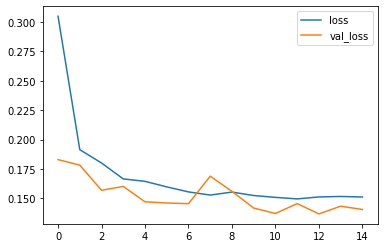

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
scores = model.evaluate_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
scores

[0.14278098940849304, 0.9496971964836121]

In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 94.9697


In [ ]:
from tensorflow.keras.models import load_model
model.save('malaria_noise_course_work1.h5')

In [ ]:
files.download("malaria_noise_course_work1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

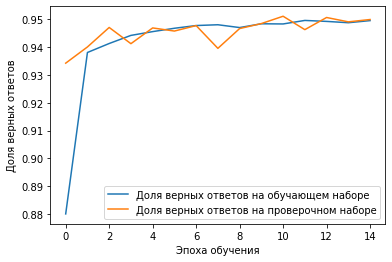

In [ ]:
plt.plot(results.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(results.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict_generator(test_image_gen)
pred_probabilities

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[0.00719377],
       [0.00673681],
       [0.00779616],
       ...,
       [0.9777233 ],
       [0.99744344],
       [0.9975108 ]], dtype=float32)

In [ ]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8952
           1       0.93      0.97      0.95      8880

    accuracy                           0.95     17832
   macro avg       0.95      0.95      0.95     17832
weighted avg       0.95      0.95      0.95     17832



In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

array([[8326,  626],
       [ 253, 8627]])

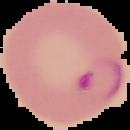

In [ ]:
my_image = image.load_img(para_cell,target_size=image_shape)
my_image

In [ ]:
my_image = image.img_to_array(my_image)
type(my_image)

numpy.ndarray

In [ ]:
my_image1 = image.img_to_array(my_image1)
type(my_image1)

numpy.ndarray

In [ ]:
my_image.shape

(130, 130, 3)

In [ ]:
my_image1.shape

NameError: ignored

In [ ]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

NameError: ignored

In [ ]:
my_image1 = np.expand_dims(my_image1, axis=0)
my_image1.shape

(1, 130, 130, 3)

In [ ]:
model.predict(my_image)

array([[0.00915899]], dtype=float32)

In [ ]:
model.predict(my_image1)

array([[0.99745136]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
#гауссовский шум
import os
import cv2
def noisy(image):
    row,col,ch= image.shape
    mean = 0
    var = 0.02
    sigma = var**0.7
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy

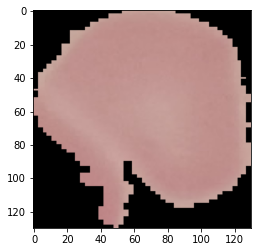

In [ ]:
img_path = my_data_dir+'/single_prediction/'+os.listdir(my_data_dir+'/single_prediction')[0]
imgp = image.load_img(img_path, target_size=(130,130))
plt.imshow(imgp)
plt.show()

In [ ]:
x = image.img_to_array(imgp)
x /= 255
x = np.expand_dims(x, axis=0)
model.predict(x)

array([[0.9821041]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


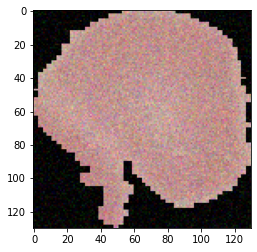

In [ ]:
#запуск с шумом
x = image.img_to_array(imgp)
x /= 255
x = noisy(x)
plt.imshow(x)

In [ ]:
x = image.img_to_array(imgp)
x /= 255
x = noisy(x)
x = np.expand_dims(x, axis=0)
model.predict(x)

array([[0.99197644]], dtype=float32)

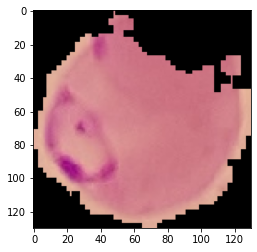

In [ ]:
img1_path = my_data_dir+'/single_prediction/'+os.listdir(my_data_dir+'/single_prediction')[1]
img1 = image.load_img(img1_path, target_size=(130,130))
plt.imshow(img1)
plt.show()

In [ ]:
#запуск без шума
x1 = image.img_to_array(img1)
x1 /= 255
x1 = np.expand_dims(x1, axis=0)
model.predict(x1)

array([[0.00673681]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


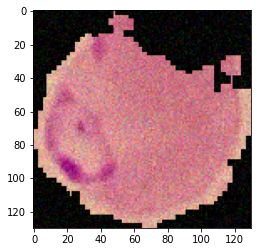

In [ ]:
#запуск с шумом
x1 = image.img_to_array(img1)
x1 /= 255
x1 = noisy(x1)
plt.imshow(x1)

In [ ]:
x1 = image.img_to_array(img1)
x1 /= 255
x1 = noisy(x1)
x1 = np.expand_dims(x1, axis=0)
model.predict(x1)

array([[0.03802408]], dtype=float32)